# Intro to Graph Analysis in Python
Kyle Kulas

Tutorial: https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [21]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [4]:
G.nodes()

NodeView((1, 2, 3))

In [5]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [6]:
G[1]

AtlasView({2: {}, 3: {}})

In [7]:
G[1][2]

{}

In [8]:
G.edges[1,2]

{}

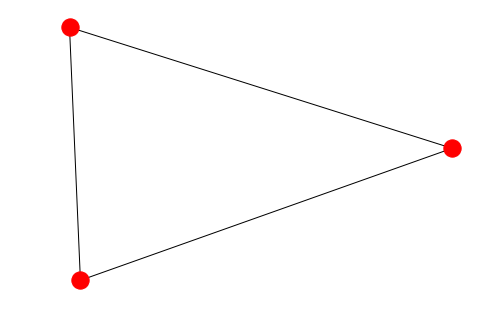

In [9]:
nx.draw(G)

In [10]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



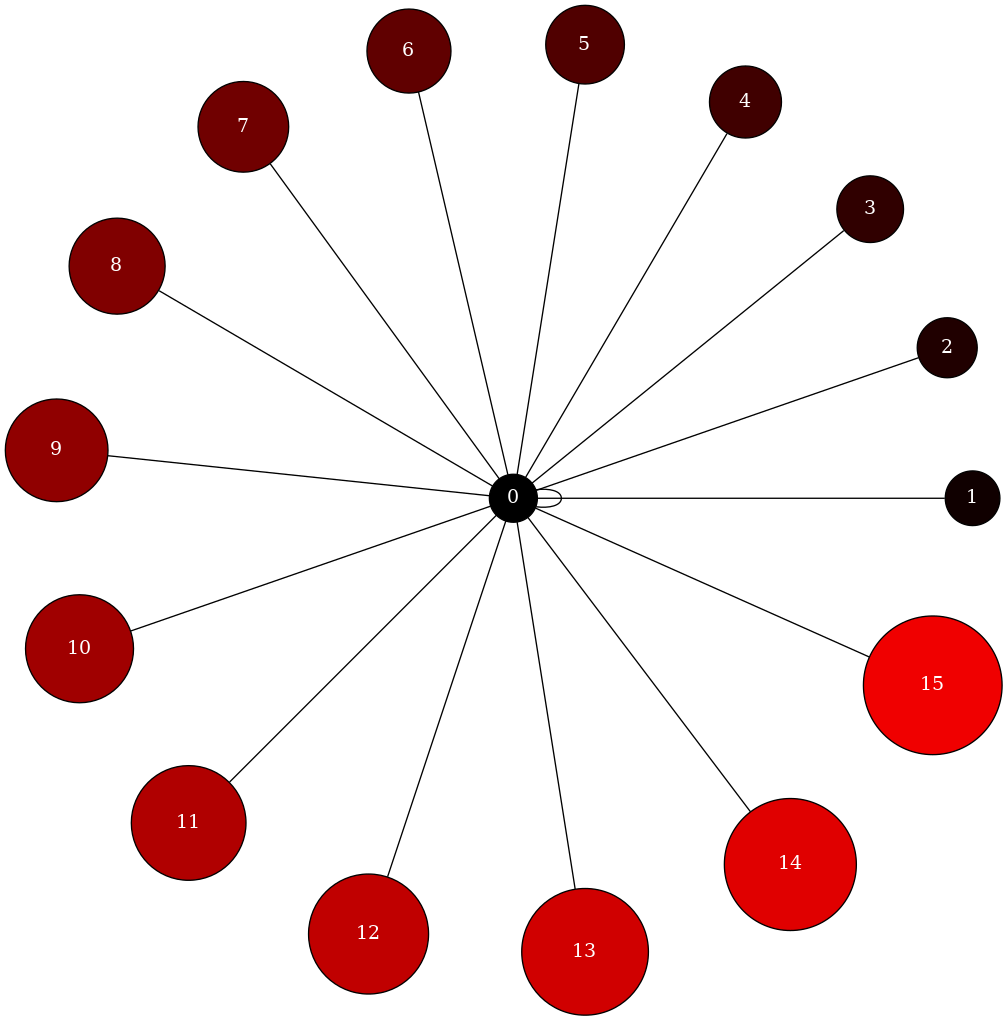

In [16]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
    B.add_edge(0,i)
    n=B.get_node(i)
    n.attr['fillcolor']="#%2x0000"%(i*16)
    n.attr['height']="%s"%(i/16.0+0.5)
    n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

Image('star.png', width=650) # The Graph visualization we created above.

In [20]:
data = pd.read_csv('data/Airlines.csv')
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


- We notice that origin and destination look like good choices for Nodes. Everything can then be imagined as either node or edge attributes. A single edge can be thought of as a journey. And such a journey will have various times, a flight number, an airplane tail number etc associated with it
- We notice that the year, month, day and time information is spread over many columns. We want to create one datetime column containing all of this information. We also need to keep scheduled and actual time of arrival and departure separate. So we should finally have 4 datetime columns (Scheduled and actual times of arrival and departure)
- Additionally, the time columns are not in a proper format. 4:30 pm is represented as 1630 instead of 16:30. There is no delimiter to split that column. One approach is to use pandas string methods and regular expressions
- We should also note that sched_dep_time and sched_arr_time are int64 dtype and dep_time and arr_time are float64 dtype
- An additional complication is NaN values

In [41]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [23]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [24]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [25]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [26]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [27]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [28]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [30]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

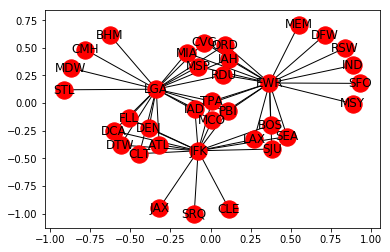

In [31]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports

In [33]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates


{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

In [34]:
nx.density(FG) # Average edge density of the Graphs

0.09047619047619047

In [35]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [36]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

Let us take the example of JAX and DFW airports:

In [37]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [38]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [39]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']